In [139]:
import os
import sys
import ast
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns

current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.insert(0, parent_directory)

import pandas as pd
from utils.csv import load_dataframe_from_csv
import time

import dataloader
import importlib
importlib.reload(dataloader)

from dataloader import load_initial_dataset, load_oscar_winning_films, load_oscar_winning_films_ids, load_oscar_winning_actors, load_oscar_winning_actresses, load_oscar_winning_supporting_actors, load_oscar_winning_supporting_actresses


Load the initial CMU datasets

In [140]:
PATH_IN = 'dataset'
movie, character, plot_summaries,  tvtropes, name_clusters = load_initial_dataset(PATH_IN)

Generate the data frame containing the dataframes and save it into csv files

In [143]:
OS = 'MAC'
load_oscar_winning_films(OS)
load_oscar_winning_actors(OS)
load_oscar_winning_actresses(OS)
load_oscar_winning_supporting_actors(OS)
load_oscar_winning_supporting_actresses(OS)
load_oscar_winning_films_ids(OS)

Load the csv files

In [145]:
oscar_winning_films = load_dataframe_from_csv('oscar_winning_films')
oscar_winning_films_ids = load_dataframe_from_csv('oscar_winning_films_ids')
oscar_winning_actors = load_dataframe_from_csv('oscar_winning_actors')
oscar_winning_actresses = load_dataframe_from_csv('oscar_winning_actresses')
oscar_winning_supporting_actors = load_dataframe_from_csv('oscar_winning_supporting_actors')
oscar_winning_supporting_actresses = load_dataframe_from_csv('oscar_winning_supporting_actresses')

In [37]:
OS = 'MAC'
load_reviews(oscar_winning_films.values, 20, OS)

Sunrise: A Song of Two Humans
White Shadows in the South Seas
With Byrd at the South Pole
Tabu: A Story of the South Seas
Shanghai Express
A Farewell to Arms
Cleopatra
A Midsummer Night's Dream
Anthony Adverse
The Garden of Allah
The Good Earth
A Star Is Born
The Great Waltz
Sweethearts
Wuthering Heights
Gone with the Wind
Rebecca
The Thief of Bagdad
How Green Was My Valley
Blood and Sand
Mrs. Miniver
The Black Swan
The Song of Bernadette
Phantom of the Opera
Laura
Wilson
The Picture of Dorian Gray


KeyboardInterrupt: 

Generate the data frame containing the actors that won an oscar

In [62]:
actors = oscar_winning_actors['actors']
actresses = oscar_winning_actresses['actresses']
supporting_actors = oscar_winning_supporting_actors['supporting_actors']
supporting_actresses = oscar_winning_supporting_actresses['supporting_actresses']

oscar_winners = pd.concat([actors, actresses, supporting_actors, supporting_actresses], ignore_index=True)
oscar_winners_df = pd.DataFrame(oscar_winners, columns=['Actor'])

print(oscar_winners_df)

                Actor
0       Emil Jannings
1       Warner Baxter
2       George Arliss
3    Lionel Barrymore
4       Wallace Beery
..                ...
361        Laura Dern
362     Yuh-jung Youn
363     Ariana DeBose
364         Jamie Lee
365       Da'Vine Joy

[366 rows x 1 columns]


In [ ]:
oscar_winners = character[character['Actor name'].isin(oscar_winners_df['Actor'])]
print(oscar_winners)

        Wikipedia movie ID Freebase movie ID Movie release date  \
64                  175026         /m/017n1p               1930   
74                18768079        /m/04gvb8t         1938-07-05   
77                  612710         /m/02wjqm         1999-10-01   
258                1369204         /m/04x8zs               1939   
260                1369204         /m/04x8zs               1939   
...                    ...               ...                ...   
450438            11823946        /m/02rtqvb         1996-10-25   
450548             6456053         /m/0g605h         1964-12-31   
450549             6456053         /m/0g605h         1964-12-31   
450550             6456053         /m/0g605h         1964-12-31   
450558             6456053         /m/0g605h         1964-12-31   

                       Character name Actor date of birth  Actor gender  \
64                                NaN          1897-08-31             M   
74                                NaN        

In [71]:
print(movie)

       Wikipedia movie ID Freebase movie ID  \
0                  975900         /m/03vyhn   
1                 3196793         /m/08yl5d   
2                28463795        /m/0crgdbh   
3                 9363483        /m/0285_cd   
4                  261236         /m/01mrr1   
...                   ...               ...   
81736            35228177        /m/0j7hxnt   
81737            34980460        /m/0g4pl34   
81738             9971909        /m/02pygw1   
81739              913762         /m/03pcrp   
81740            12476867        /m/02w7zz8   

                                              Movie name Movie release date  \
0                                         Ghosts of Mars         2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                            Brun bitter               1988   
3                                       White Of The Eye               1987   
4                                      A

In [ ]:
#Les films qui ont gagné un oscar.
oscar_films_ids = oscar_winning_films_ids['Page ID']
oscar_films = movie[movie['Wikipedia movie ID'].isin(oscar_winning_films_ids['Page ID'])]

print(oscar_films)

       Wikipedia movie ID Freebase movie ID  \
796               4836072         /m/0cq7kw   
3818              3920193         /m/0b6tzs   
5485             18388326        /m/04d_mvd   
6495               129368          /m/0yx_w   
9086              1740284         /m/05sbv3   
...                   ...               ...   
79566               66870          /m/0hmr4   
79900               45772          /m/0cf08   
80209              369508         /m/0209hj   
80707               43452          /m/0bx0l   
80920              174251         /m/017jd9   

                                          Movie name Movie release date  \
796                                     My Fair Lady         1964-10-21   
3818                          No Country for Old Men         2007-11-04   
5485                      You Can't Take It With You         1938-08-23   
6495                                        Rain Man         1988-12-12   
9086                                            Gigi        

C:\Users\khali\AppData\Local\Temp\ipykernel_53240\3991180014.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_films['Genres'] = oscar_films['Movie genres (Freebase ID:name tuples)'].apply(extract_genres)


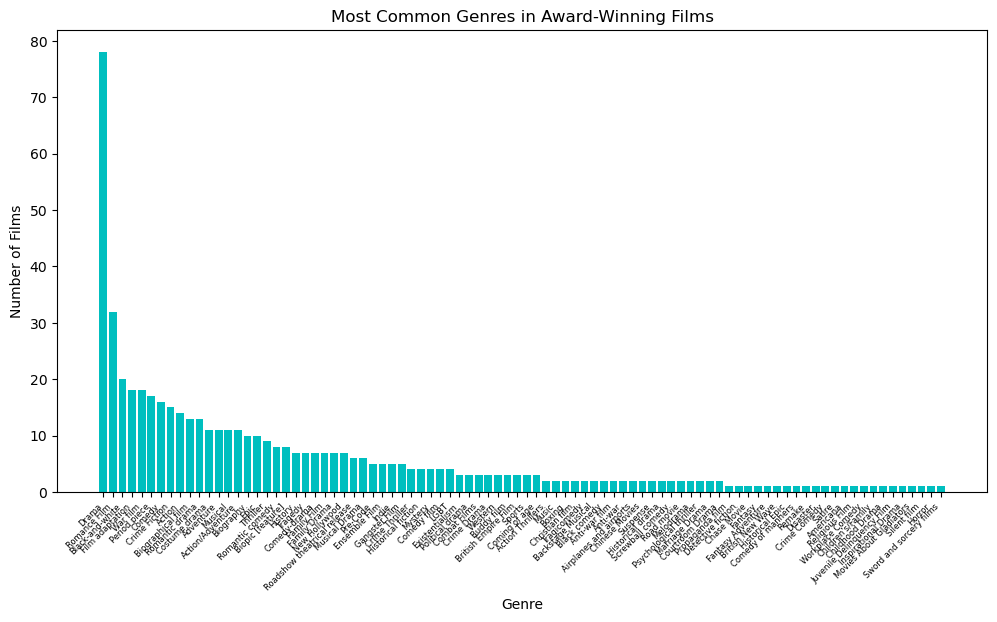

In [149]:
#Trends in Movie Genres for Award-Winning Films

def extract_genres(genre_dict_str):
    try:
        # Safely evaluate the string as a dictionary
        genre_dict = ast.literal_eval(genre_dict_str)
        # Return the list of genres
        return list(genre_dict.values())
    except (ValueError, SyntaxError):
        return []

# Apply the function to extract genres from oscar_films
oscar_films['Genres'] = oscar_films['Movie genres (Freebase ID:name tuples)'].apply(extract_genres)

# Flatten the list of genres and count occurrences
all_genres = [genre for sublist in oscar_films['Genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Convert the counts to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Plot the genre counts as a bar chart
plt.figure(figsize=(12, 6))
genre_counts_df.sort_values(by='Count', ascending=False, inplace=True)
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'], color='c')

plt.xticks(rotation= 45, ha='right', fontsize=6)
plt.title('Most Common Genres in Award-Winning Films')
plt.ylabel('Number of Films')
plt.xlabel('Genre')
plt.show()